# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 3. Обработка текстов.

### Общая информация

Дата выдачи: 13.01.2022

Мягкий дедлайн: 23:59MSK 6.02.2022

Жесткий дедлайн: 23:59MSK 10.02.2022

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать перед самым жестким дедлайном, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В данном домашнем задании вам предстоит предсказывать пользовательскую оценку отеля по тексту отзыва. Нужно обучиться на данных с кэггла и заслать в [соревнование](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) предикт. По той же ссылке можете скачать данные.

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву.

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 0.92 на публичном лидерборде. В противном случае мы будем вынуждены не засчитать задание :( 

#### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

Для локального тестирования используйте предоставленное разбиение на трейн и тест.

Good luck & have fun! 💪

#### Использовать любые данные для обучения кроме предоставленных организаторами строго запрещено. В последней части можно использовать предобученные модели из библиотеки `transformers`.

In [1]:
PATH_TO_TRAIN_DATA = './train.csv'

In [2]:
import pandas as pd

df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


Предобработка текста может сказываться на качестве вашей модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру. 
Однако можно не ограничиваться этим набором преобразований. Подумайте, что еще можно сделать с текстами, чтобы помочь будущим моделям? Добавьте преобразования, которые могли бы помочь по вашему мнению.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

In [331]:
import string

import nltk
# nltk.download('punkt')

from nltk.tokenize import word_tokenize

def process_text(text):
    return text.lower()

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1412, test_size=0.05) # <- для локального тестирования
df_test_kaggle = pd.read_csv('./test.csv')

### Часть 1. 1 балл

Обучите логистическую или линейную регрессию на TF-IDF векторах текстов.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

Предскажите этой моделью тестовые данные из [соревнования](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) и сделайте сабмит. Какой у вас получился скор? Прикрепите скриншот из кэггла.

### Часть 2. 2 балла

Обучите логистическую или линейную регрессию на усредненных Word2Vec векторах. 

In [12]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

import numpy as np
import re

In [332]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# nltk.download('wordnet')
# nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

stop_words = set(stop_words)
stop_words -= {'no', 'not', 'neither'}

In [242]:
def process(text):
    text = re.sub(r'<.+?!:;,>', '', text.lower())
    text = re.sub(r'[^a-z]', ' ', text)
    text = [word for word in nltk.word_tokenize(text) if word not in stop_words]
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

In [256]:
df = pd.read_csv(PATH_TO_TRAIN_DATA)
df['positive'] = df['positive'].apply(process)
df['negative'] = df['negative'].apply(process)
texts = df['positive'] + df['negative']

In [245]:
vector_size = 500

In [246]:
model = Word2Vec(texts, 
                 vector_size=vector_size, 
                 min_count=10, negative=15, 
                 window=5,
                 epochs=50).wv


In [294]:
def get_mean_review_embedding(positive, negative, vector_size=vector_size):
    embeddings_pos = np.array([
        model.get_vector(word, norm=True) for word in positive
        if word in model.key_to_index])
    
    embeddings_neg = np.array([
        model.get_vector(word, norm=True) for word in negative
        if word in model.key_to_index])

    if len(embeddings_pos) > 0:
        embeddings_pos = np.mean(embeddings_pos, axis=0)
    else:
        embeddings_pos = np.zeros(vector_size)
    if len(embeddings_neg) > 0:
        embeddings_neg = np.mean(embeddings_neg, axis=0)
    else:b
        embeddings_neg = np.zeros(vector_size)
    
    return np.concatenate((embeddings_pos, embeddings_neg))

In [248]:
embeddings = [get_mean_review_embedding(positive, negative) 
              for positive, negative in zip(df.positive.values, df.negative.values)]

In [249]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [250]:
def train_linear_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1412) 
    regressor = Ridge()
    regressor.fit(X_train, y_train)
    
    mae = mean_absolute_error(y_test, regressor.predict(X_test))
    print('MAE:', mae)
    return regressor, mae

In [251]:
df.columns

Index(['review_id', 'negative', 'positive', 'score'], dtype='object')

In [252]:
lr_w2v_mean, _ = train_linear_model(embeddings, df.score);

MAE: 0.9219


In [307]:
df_test_kaggle['positive'] = df_test_kaggle['positive'].apply(process)
df_test_kaggle['negative'] = df_test_kaggle['negative'].apply(process)

In [308]:
kaggle_embeddings = [get_mean_review_embedding(pos, neg) for pos, neg in 
                     zip(df_test_kaggle.positive.values, df_test_kaggle.negative.values)]

In [309]:
predictions = lr_w2v_mean.predict(kaggle_embeddings)

In [310]:
result = pd.DataFrame({'review_id': df_test_kaggle.review_id, 'score': predictions})

In [315]:
result.score[result.score < 2.5] = 2.5
result.score[result.score > 10] = 10

<ipython-input-315-21f234d272a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.score[result.score < 2.5] = 2.5
<ipython-input-315-21f234d272a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.score[result.score > 10] = 10


In [319]:
result.to_csv('w2v_mean.csv', index=None)

Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

In [254]:
from collections import Counter

In [267]:
def calc_idf(texts):
    df_counter = Counter()
    for document in texts:
        df_counter.update(document)
    
    log_n_docs = np.log(1 + len(texts))
    
    idf_for_word = {word: log_n_docs - np.log(1 + df) for word, df in df_counter.items()}
    return idf_for_word

In [268]:
idf_dict = calc_idf(texts)

In [270]:
list(idf_dict.items())[:10]

[('issue', 4.275157272996786),
 ('wifi', 3.274662840287199),
 ('connection', 4.904934839624143),
 ('no', 0.7510193713546087),
 ('positive', 2.644944566738136),
 ('tv', 3.837853607203895),
 ('not', 1.224423635180722),
 ('working', 4.042141690725167),
 ('pillow', 3.848588832821612),
 ('beautiful', 3.539435500895599)]

In [273]:
def get_idf_review_embedding(positive, negative):
    embeddings_pos = []
    idfs_pos = 0
    for word in positive:
        if word in model.key_to_index and word in idf_dict:
            embeddings_pos.append(model.get_vector(word, norm=True))
            idfs_pos += idf_dict[word]
    if len(embeddings_pos) == 0:
        embeddings_pos = np.zeros(vector_size)
    else:
        embeddings_pos = np.sum(embeddings_pos, axis=0) / idfs_pos
    
    embeddings_neg = []
    idfs_neg = 0
    for word in negative:
        if word in model.key_to_index and word in idf_dict:
            embeddings_neg.append(model.get_vector(word, norm=True))
            idfs_neg += idf_dict[word]
            
    if len(embeddings_neg) == 0:
        embeddings_neg = np.zeros(vector_size)
    else:
        embeddings_neg = np.sum(embeddings_neg, axis=0) / idfs_neg
    
    return np.concatenate((embeddings_pos, embeddings_neg))

In [276]:
from tqdm.notebook import tqdm

In [277]:
embeddings_idf = [get_idf_review_embedding(positive, negative) 
                  for positive, negative in tqdm(zip(df.positive.values, df.negative.values), total=len(df))]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [278]:
lr_idf, _ = train_linear_model(embeddings_idf, df.score);

MAE: 0.9431


Проведите эксперименты с размерностью эмбеддинга. Для каждого из двух методов постройте график зависимости качества модели от размерности эмбеддинга. 

#### Сделайте выводы:

In [298]:
def run_exp(vector_size):
    model = Word2Vec(texts, 
                 vector_size=vector_size, 
                 min_count=10, negative=15, 
                 window=5,
                 epochs=10).wv
    
    def get_mean_review_embedding(positive, negative, vector_size=vector_size):
        embeddings_pos = np.array([
            model.get_vector(word, norm=True) for word in positive
            if word in model.key_to_index])

        embeddings_neg = np.array([
            model.get_vector(word, norm=True) for word in negative
            if word in model.key_to_index])

        if len(embeddings_pos) > 0:
            embeddings_pos = np.mean(embeddings_pos, axis=0)
        else:
            embeddings_pos = np.zeros(vector_size)
        if len(embeddings_neg) > 0:
            embeddings_neg = np.mean(embeddings_neg, axis=0)
        else:
            embeddings_neg = np.zeros(vector_size)
        return np.concatenate((embeddings_pos, embeddings_neg))
    
    embeddings = [get_mean_review_embedding(positive, negative, vector_size=vector_size) 
                  for positive, negative in zip(df.positive.values, df.negative.values)]
    embeddings = np.array(embeddings)
    _, mae = train_linear_model(embeddings, df.score)
    return mae

In [300]:
vector_sizes = [10, 50, 100, 200, 500, 1000]
maes = [run_exp(vector_size) for vector_size in vector_sizes]

MAE: 1.0741
MAE: 0.9726
MAE: 0.9532
MAE: 0.9340
MAE: 0.9303
MAE: 0.9302


In [301]:
import matplotlib.pyplot as plt

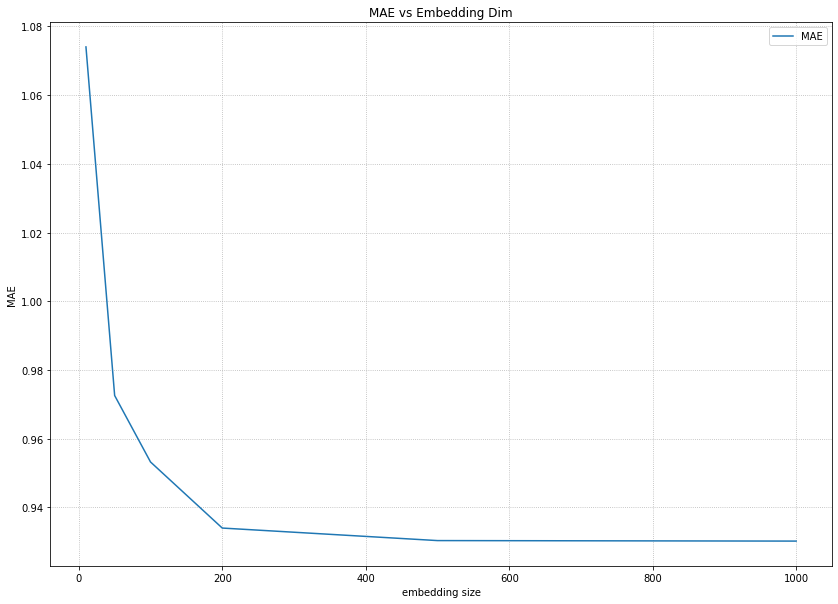

In [303]:
plt.figure(figsize=(14, 10))
plt.plot(vector_sizes, maes, label='MAE')
plt.legend()
plt.xlabel('embedding size')
plt.ylabel('MAE')
plt.title('MAE vs Embedding Dim')
plt.grid(ls=":")
plt.show()

Теперь попробуйте обучить логистическую или линейную регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.


In [305]:
run_exp(300)

MAE: 0.9301


0.9301400959942863

In [330]:
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-300')

[===-----------------------------------------------] 6.3% 23.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 13.8% 51.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.6% 81.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 29.4% 110.7/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.5% 140.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.6% 171.4/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.8% 202.2/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.9% 232.6/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.6% 291.9/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.7% 322.3/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 376.1/376.1MB downloaded


In [356]:
def get_mean_review_embedding(positive, negative, model, vector_size=vector_size):
    embeddings_pos = np.array([
        model.get_vector(word, norm=True) for word in positive
        if word in model.key_to_index])

    embeddings_neg = np.array([
        model.get_vector(word, norm=True) for word in negative
        if word in model.key_to_index])

    if len(embeddings_pos) > 0:
        embeddings_pos = np.mean(embeddings_pos, axis=0)
    else:
        embeddings_pos = np.zeros(vector_size)
    if len(embeddings_neg) > 0:
        embeddings_neg = np.mean(embeddings_neg, axis=0)
    else:
        embeddings_neg = np.zeros(vector_size)
    return np.concatenate((embeddings_pos, embeddings_neg))


In [358]:
embeddings = [get_mean_review_embedding(positive, negative, model=model, vector_size=300) 
              for positive, negative in zip(df.positive.values, df.negative.values)]
embeddings = np.array(embeddings)
_, mae = train_linear_model(embeddings, df.score)
print(mae)

MAE: 0.9528
0.9528016723799783


#### Выводы:

Можно сделать следующие выводы:

1) предобученные модели часто сразу дают хорошее качество, но обычно оно ниже чем для моделей, обученных под конкретную задачу. 
2) с ростом размерности эмбеддинга растет и качество модели (до момента когда выучить больше ничего нельзя)

Предскажите вашей лучшей моделью из этого задания тестовые данные из [соревнования](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) и сделайте сабмит. Какой у вас получился скор? Прикрепите скриншот из кэггла.

### Часть 3. 4 балла

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки.

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence)

In [32]:
import torch
from torch import nn
from torch.nn import functional as F

In [33]:
text_columns = ['positive', 'negative']

In [34]:
from collections import Counter
token_counts = Counter()

import nltk

tokenizer = nltk.tokenize.WordPunctTokenizer()

for col in text_columns:
    df_train[col] = df_train[col].apply(lambda el: " ".join(tokenizer.tokenize(str(el).lower())))
    df_test[col] = df_test[col].apply(lambda el: " ".join(tokenizer.tokenize(str(el).lower())))
    df_test_kaggle[col] = df_test_kaggle[col].apply(lambda el: " ".join(tokenizer.tokenize(str(el).lower())))

    
for col in text_columns:
    for text in df_train[col].values:
        token_counts.update(text.split())

min_count = 10

tokens = sorted(t for t, c in token_counts.items() if c >= min_count)

UNK, PAD = "UNK", "PAD"
tokens = [UNK, PAD] + tokens

token_to_id = {t: i for i, t in enumerate(tokens)}

UNK_IX, PAD_IX = map(token_to_id.get, [UNK, PAD])

def as_matrix(sequences, max_len=None):
    """ Convert a list of tokens into a matrix with padding """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
        
    max_len = min(max(map(len, sequences)), max_len or float('inf'))
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix

<ipython-input-34-0a22691ed38e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].apply(lambda el: " ".join(tokenizer.tokenize(str(el).lower())))
<ipython-input-34-0a22691ed38e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = df_test[col].apply(lambda el: " ".join(tokenizer.tokenize(str(el).lower())))


In [35]:
import numpy as np

In [36]:
device = torch.device('cuda:0')

In [37]:
import torch

def to_tensors(batch, device):
    batch_tensors = dict()
    for key, arr in batch.items():
        if key in ["positive", "negative"]:
            batch_tensors[key] = torch.tensor(arr, device=device, dtype=torch.int64)
        else:
            batch_tensors[key] = torch.tensor(arr, device=device)
    return batch_tensors

def make_batch(data, max_len=None, word_dropout=0, device=device):
    """
    Creates a keras-friendly dict from the batch data.
    :param word_dropout: replaces token index with UNK_IX with this probability
    :returns: a dict with {'title' : int64[batch, title_max_len]
    """
    batch = {}
    batch["positive"] = as_matrix(data["positive"].values, max_len)
    batch["negative"] = as_matrix(data["negative"].values, max_len)
    
    if TARGET_COLUMN in data.columns:
        batch[TARGET_COLUMN] = data[TARGET_COLUMN].values
    
    return to_tensors(batch, device)

def apply_word_dropout(matrix, keep_prop, replace_with=UNK_IX, pad_ix=PAD_IX,):
    dropout_mask = np.random.choice(2, np.shape(matrix), p=[keep_prop, 1 - keep_prop])
    dropout_mask &= matrix != pad_ix
    return np.choose(dropout_mask, [matrix, np.full_like(matrix, replace_with)])

def iterate_minibatches(data, batch_size=256, shuffle=True, cycle=False, device=device, **kwargs):
    """ iterates minibatches of data in random order """
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)

        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start : start + batch_size]], **kwargs)
            yield batch
        
        if not cycle: break

In [38]:
from tqdm.notebook import tqdm

In [47]:
import copy

In [80]:
def train_model(model, train_data, val_data, optim, batch_size=65, 
                max_epochs=7, patience=5, criterion=nn.L1Loss(reduction="sum")):
    best_state = None
    best_mae = float("+inf")
    no_gain_conseq_iters = 0
    

    scores = {"train": list(), "val": list()}

    for epoch in range(max_epochs):
        model.train(True)
        mae = 0
        n = 0
        for batch in tqdm(iterate_minibatches(train_data, batch_size=batch_size, device=device, max_len=50),
                          total = len(train_data) // batch_size):
            y_pred = model(batch)
            loss = criterion(y_pred, batch[TARGET_COLUMN])

            optim.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            
            loss_item = loss.item()
            if np.isnan(loss_item):
                print('loss item is none((')
                print(batch)
            optim.step()

            mae += loss_item
            n += len(batch[TARGET_COLUMN])

        val_mae = test_model(model, val_data, max_len=50)
        scores["train"].append(mae / n)
        scores["val"].append(val_mae)
        
        print('epoch train mae =', scores['train'][-1])
        print('validation mae =', scores['val'][-1])
        if val_mae < best_mae:
            best_mae = val_mae
            best_state = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), 'best.pt')
            no_gain_conseq_iters = 0
        else:
            no_gain_conseq_iters += 1
    
        if no_gain_conseq_iters == patience:
            print(f"Model was trained for {epoch} epoches")
            break
    
    model.load_state_dict(best_state)
    return model, scores

In [81]:
def test_model(model, data, max_len=50):
    criterion = nn.L1Loss()
    mae = 0.0
    n = 0

    with torch.no_grad():
        model.train(False)
        for batch in iterate_minibatches(data, batch_size=256, device=device, shuffle=False, max_len=50):
            y_pred = model(batch)
            mae += torch.sum(torch.abs(y_pred - batch[TARGET_COLUMN]))
            n += len(batch[TARGET_COLUMN])
    
    return mae.detach().cpu().numpy() / n

In [86]:
class RNN_BN(nn.Module):
    def __init__(self, n_tokens=len(tokens), hid_size=200):
        super().__init__()
        
        self.embed = nn.Embedding(n_tokens, hid_size, padding_idx=1)
        
        self.positive_lstm = nn.LSTM(input_size=hid_size, hidden_size=hid_size, 
                                     batch_first=True, bidirectional=True, num_layers=2, dropout=0.3)
        self.positive_bn = nn.BatchNorm1d(num_features=hid_size * 2)

        self.negative_lstm = nn.LSTM(input_size=hid_size, hidden_size=hid_size, 
                                     batch_first=True, bidirectional=True, num_layers=2, dropout=0.3)
        self.negative_bn = nn.BatchNorm1d(num_features=hid_size * 2)
        self.predictor = nn.Sequential(
            nn.Linear(hid_size * 4, hid_size),
            nn.BatchNorm1d(num_features=hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )

    def forward(self, batch):
        positive = self.embed(batch["positive"])
        positive, _ = self.positive_lstm(positive)
        positive = positive[:, -1, :]
        positive = self.positive_bn(positive)

        negative = self.embed(batch["negative"])
        negative, _ = self.negative_lstm(negative)
        negative = negative[:, -1, :]
        negative = self.negative_bn(negative)

        x = torch.cat([positive, negative], dim=1)
        
        return torch.clamp(self.predictor(x).squeeze(-1), 0, 10)

In [87]:
model = RNN_BN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=5e-5)

In [88]:
TARGET_COLUMN='score'

In [97]:
optimizer.param_groups[0]['lr'] = 5e-5

In [ ]:
model, score = train_model(model, df_train, df_test, optimizer, max_epochs=15)
mae = round(test_model(model, df_test), 3)
print('validation mae =', mae)

  0%|          | 0/1461 [00:00<?, ?it/s]

epoch train mae = 0.6704519900070993
validation mae = 0.7644348051738737


  0%|          | 0/1461 [00:00<?, ?it/s]

epoch train mae = 0.6543979135212146
validation mae = 0.7640982296657562


  0%|          | 0/1461 [00:00<?, ?it/s]

epoch train mae = 0.6485830631858425
validation mae = 0.766428402299881


  0%|          | 0/1461 [00:00<?, ?it/s]

In [90]:
def predict_model(model, data):
    preds = []
    with torch.no_grad():
        model.train(False)
        for batch in iterate_minibatches(data, batch_size=256, device=device, shuffle=False):
            y_pred = model(batch)
            preds.extend(y_pred.cpu().numpy().tolist())
    return preds

In [91]:
preds = predict_model(model, df_test_kaggle)

In [92]:
submit = pd.DataFrame({'review_id': df_test_kaggle.review_id, 'score': preds})

In [93]:
submit.score.describe()

count    20000.000000
mean         8.881211
std          0.908819
min          3.625151
25%          8.392467
50%          9.035201
75%          9.567436
max         10.000000
Name: score, dtype: float64

In [94]:
submit.to_csv('submit_rnn.csv', index=None)

### Контест (до 3 баллов)

По итогам всех ваших экспериментов выберите модель, которую считаете лучшей. Сделайте сабмит в контест. В зависимости от вашего скора на публичном лидерборде, мы начислим вам баллы:

 - <0.76 - 3 балла
 - [0.76; 0.78) - 2 балла
 - [0.78; 0.8) - 1 балл

Модель выше дала качество 0.765